In [ ]:
import pandas as pd
stock_data=pd.read_csv('NFLX (1).csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-11,352.000000,358.980011,350.029999,358.859985,358.859985,5387300
2019-03-12,359.369995,360.130005,353.799988,356.269989,356.269989,5164600
2019-03-13,355.809998,362.480011,352.769989,361.209991,361.209991,6444100
2019-03-14,360.500000,363.839996,358.100006,358.820007,358.820007,5271400
2019-03-15,361.019989,364.000000,358.890015,361.459991,361.459991,8444500


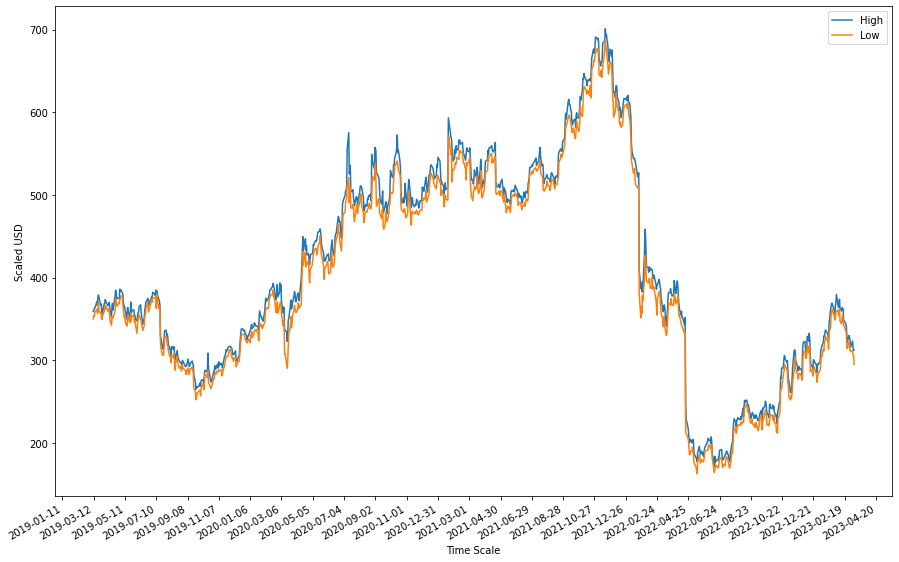

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates. DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt. legend ()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from tensorflow.keras. models import Sequential 
from tensorflow. keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dropout 
from tensorflow. keras. layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import mean_squared_error

In [ ]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]

In [ ]:
X_feat

,Open,High,Low
Date,,,
2019-03-11,352.000000,358.980011,350.029999
2019-03-12,359.369995,360.130005,353.799988
2019-03-13,355.809998,362.480011,352.769989
2019-03-14,360.500000,363.839996,358.100006
2019-03-15,361.019989,364.000000,358.890015
...,...,...,...
2023-03-03,315.450012,317.489990,310.820007
2023-03-06,317.000000,323.299988,311.839996
2023-03-07,312.679993,314.299988,306.619995


In [ ]:
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat. values)
X_ft = pd.DataFrame (columns=X_feat. columns, data=X_ft, index=X_feat.index)

In [ ]:
len(X_ft)

1008

In [ ]:
def lstm_split (data, n_steps) :
  X, y = [], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps,:-1]) 
    y.append(data[i+n_steps-1,-1])
  return np.array(X), np.array (y)  

In [ ]:
X1, y1 = lstm_split(X_ft.values, n_steps=2)
print(y1.shape)
train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = X_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx: ]
y_train, y_test = y1[:split_idx], y1[split_idx:]
x_train_date, X_test_date = date_index[:split_idx], date_index[split_idx: ]
print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(1007,)
(1007, 2, 2) (806, 2, 2) (201, 2, 2) (201,)


In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4480      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=lstm.fit(X_train, y_train,epochs=100, batch_size=4, verbose=2, shuffle=False)

Epoch 1/100
202/202 - 2s - loss: 0.2051 - 2s/epoch - 12ms/step
Epoch 2/100
202/202 - 1s - loss: 0.0106 - 557ms/epoch - 3ms/step
Epoch 3/100
202/202 - 1s - loss: 0.0077 - 521ms/epoch - 3ms/step
Epoch 4/100
202/202 - 1s - loss: 0.0068 - 550ms/epoch - 3ms/step
Epoch 5/100
202/202 - 1s - loss: 0.0055 - 516ms/epoch - 3ms/step
Epoch 6/100
202/202 - 1s - loss: 0.0052 - 596ms/epoch - 3ms/step
Epoch 7/100
202/202 - 1s - loss: 0.0047 - 512ms/epoch - 3ms/step
Epoch 8/100
202/202 - 1s - loss: 0.0044 - 515ms/epoch - 3ms/step
Epoch 9/100
202/202 - 1s - loss: 0.0042 - 706ms/epoch - 3ms/step
Epoch 10/100
202/202 - 1s - loss: 0.0040 - 751ms/epoch - 4ms/step
Epoch 11/100
202/202 - 1s - loss: 0.0039 - 886ms/epoch - 4ms/step
Epoch 12/100
202/202 - 1s - loss: 0.0037 - 732ms/epoch - 4ms/step
Epoch 13/100
202/202 - 1s - loss: 0.0036 - 616ms/epoch - 3ms/step
Epoch 14/100
202/202 - 1s - loss: 0.0035 - 869ms/epoch - 4ms/step
Epoch 15/100
202/202 - 1s - loss: 0.0035 - 977ms/epoch - 5ms/step
Epoch 16/100
202/202 

In [ ]:
y_pred=lstm.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[-1.6835274 ],
       [-1.7045475 ],
       [-1.7389308 ],
       [-1.7175839 ],
       [-1.675517  ],
       [-1.6390382 ],
       [-1.612028  ],
       [-1.5945193 ],
       [-1.6185006 ],
       [-1.5889106 ],
       [-1.579234  ],
       [-1.6345762 ],
       [-1.576121  ],
       [-1.5981883 ],
       [-1.7518167 ],
       [-1.7806585 ],
       [-1.8369716 ],
       [-1.7696213 ],
       [-1.7948712 ],
       [-1.7766038 ],
       [-1.7654535 ],
       [-1.7820511 ],
       [-1.7331651 ],
       [-1.6886815 ],
       [-1.6578249 ],
       [-1.675656  ],
       [-1.7731525 ],
       [-1.7706844 ],
       [-1.7669458 ],
       [-1.7413678 ],
       [-1.7029043 ],
       [-1.697274  ],
       [-1.6936401 ],
       [-1.7234163 ],
       [-1.7770294 ],
       [-1.8011956 ],
       [-1.7771406 ],
       [-1.725798  ],
       [-1.6077844 ],
       [-1.6218609 ],
       [-1.4815522 ],
       [-1.4508654 ],
       [-1.4020855 ],
       [-1.4327081 ],
       [-1.4754297 ],
       [-1

In [ ]:
y_test.shape

(201,)

In [ ]:
rmse = mean_squared_error(y_test,y_pred , squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: " ,rmse)
print("MAPE: ", mape)

RSME:  0.03640894071603977
MAPE:  0.027974986415248926


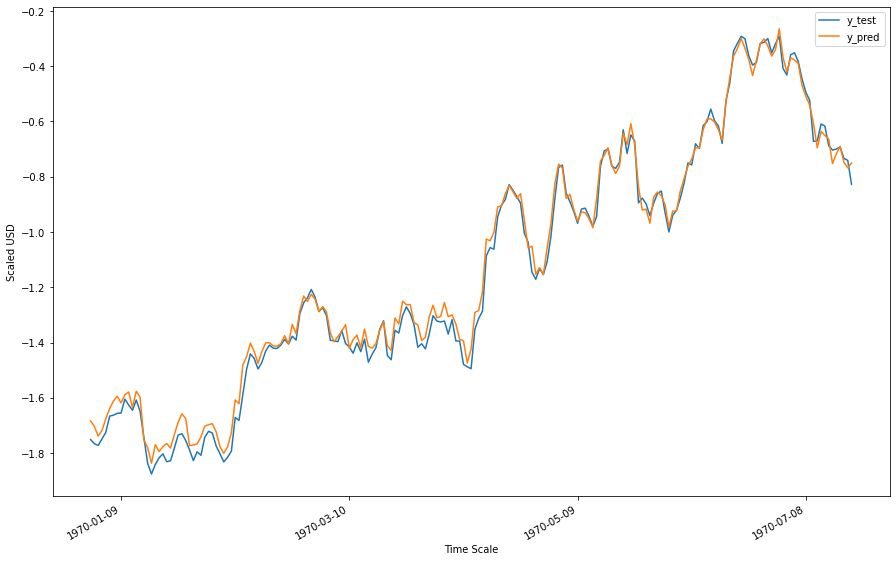

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates. DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot( y_test, label='y_test')
plt.plot( y_pred, label='y_pred')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt. legend ()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
type(X_test_date)

pandas.core.indexes.base.Index

In [ ]:
y_pred.reshape(201,)

array([-1.7106099 , -1.7297521 , -1.7628524 , -1.746486  , -1.7040218 ,
       -1.6675783 , -1.6433268 , -1.6265073 , -1.6546397 , -1.6193311 ,
       -1.6106263 , -1.6650604 , -1.6117543 , -1.6275893 , -1.7745516 ,
       -1.8018603 , -1.85477   , -1.7984309 , -1.8135425 , -1.800227  ,
       -1.7862194 , -1.8094585 , -1.7555441 , -1.7183233 , -1.6839843 ,
       -1.7037848 , -1.7941195 , -1.7928948 , -1.7898562 , -1.7691733 ,
       -1.7268175 , -1.7258551 , -1.7206028 , -1.7468915 , -1.7990845 ,
       -1.8252121 , -1.7972814 , -1.7568773 , -1.6405132 , -1.6550996 ,
       -1.5239906 , -1.4900441 , -1.4404283 , -1.4683306 , -1.5094807 ,
       -1.4738704 , -1.4375184 , -1.4392079 , -1.4493731 , -1.4503695 ,
       -1.4404763 , -1.4130094 , -1.4406472 , -1.3786807 , -1.401717  ,
       -1.3284388 , -1.2746279 , -1.2877302 , -1.2621847 , -1.2782252 ,
       -1.3231274 , -1.3076651 , -1.3249897 , -1.398282  , -1.4332908 ,
       -1.4174497 , -1.3966434 , -1.3724533 , -1.457199  , -1.42